Import the libraries cv2, matplotlib and numpy


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [3]:
%matplotlib inline

Using the cascade is easy as the training is already done using a set of positive (faces) and negative (non-face)
images. 
During training, if you are using a haar cascade, then features are first computed from these images giving a 
total of 160000+ features. An adaboost classifier is then used to select the best features among them. Here , best 
features refer to the ones which can provide good classification. Once these features are selected, the weights
of each are also learned so that they can be used during testing.
During the detection phase, a window of the target size is moved over the input image, and for each subsection of 
the image , Haar features are calculated using the cascade learned above. 
In general you use a number of windows to be able to detect small as well as large objects.


Now that you know how cascades work lets use one. Import the haar cascade of frontal faces.

In [4]:
face_classifier = cv2.CascadeClassifier('F:\Edge ai\class 4\haarcascade_frontalface_default.xml')

Read an image with a face and convert to gray as the cascade will use gray images

In [5]:
i=cv2.imread('F:\Edge ai\images\\face.jpg')

In [6]:
gray = cv2.imread('F:\Edge ai\images\\face.jpg',0)

Inorder to display your image use the following

You may want to display it inside the notebook , use the following instead

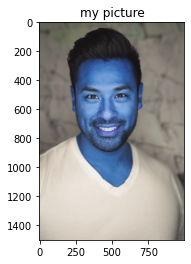

In [7]:
plt.figure()
plt.imshow(i)
plt.title('my picture')
plt.show()

Now use the cascade to detect faces specifying scale (1.3) and minimum neighbors(5)
Loop through number of faces detected and display a rectangle on them.

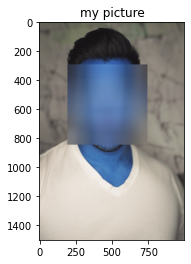

In [8]:
faces = face_classifier.detectMultiScale(gray, 1.3, 5) 
for (x,y,w,h) in faces:
    
    
    roi_color = i[y:y+h, x:x+w]
    bluri = cv2.blur(roi_color,(201,201))
    i[y:y+h, x:x+w] = bluri

    plt.figure()
    plt.imshow(i) 
    plt.title('my picture') 
    plt.show()


In [9]:
vid = cv2.VideoCapture(0)
  
while(True):
      
    # Capture the video frame
    # by frame
    ret, frame = vid.read()
  
    # Display the resulting frame
    gray = gray = cv2.cvtColor(frame   , cv2.COLOR_BGR2GRAY)
    faces = face_classifier.detectMultiScale(gray, 1.3, 5) 
    for (x,y,w,h) in faces:
        
        
        roi_color = frame[y:y+h, x:x+w]
        bluri = cv2.blur(roi_color,(55,55))
        frame[y:y+h, x:x+w] = bluri
        
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
    cv2.imshow('frame', frame)
    # the 'q' button is set as the
    # quitting button you may use any
    # desired button of your choice
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
vid.release()
# Destroy all the windows
cv2.destroyAllWindows()